In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from evaluation.post_process import *
#import h5py
from dataset.data_loader.BaseLoader import BaseLoader
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from evaluation.BlandAltmanPy import *

In [2]:
#2023 CMBP dataset
dataPath = Path("/data/rppg_23_bi_video_nt_lab/processed")

#2022 CMBP dataset
# dataPath = Path("/data/rppg_22_bi_video_nt_lab/processed")
dataPaths = list(dataPath.rglob("*.MOV"))
signalPaths = list(dataPath.rglob("*data.hdf5"))

In [3]:
def read_bvp(filename, signal = "bvp"):
    """ Get the BVP signal"""
    h = h5py.File(filename, 'r')
    if signal == "bvp":
        data = np.array(h['bvp'])
        sampling_rate = h['ecg'].attrs['sampling rate']
    elif signal == "ecg":
        data = np.array(h['ecg'])
        sampling_rate = h['ecg'].attrs['sampling rate']
    return data, sampling_rate


In [5]:
# Hr for each participant in the dataset
estimated_hr_bvp = {}
estimated_hr_ecg = {}
signal_error = []
def calcualte_HR_ECG_BVP(paths, method = "FFT"):
    for sp in paths:
        bvp, sampling_rate = read_bvp(str(sp), 'bvp')
        ecg, sampling_rate = read_bvp(str(sp), 'ecg')


        participant_ID = sp.parent.parent.stem
        scenario = sp.parent.stem
        print("processing:", participant_ID, sampling_rate)

        bvp = BaseLoader.resample_ppg(bvp, 1500)
        #hr using the BVP
        hr_bvp = calculate_HR(bvp, fs=25, hr_method=method)

        #Hr using ecg
        try:
            if sampling_rate == 300:
                wd, m = hp.process(ecg, sampling_rate, high_precision=True)
            else:
                wd, m = hp.process(ecg, sampling_rate )
        except:
            m = {}
            m['bpm'] = np.nan

        hr_ecg = m['bpm']

        #missed peaks
        peak_mask = wd['binary_peaklist']
        missed_peaks =  len(peak_mask) - sum(peak_mask)
        if missed_peaks > 3:
            signal_error.append(participant_ID + "_" + scenario)

        plt.figure(figsize=(12,4))
        hp.plotter(wd, m, title= participant_ID + scenario)
        plt.show()

        if participant_ID in estimated_hr_bvp.keys():
            estimated_hr_bvp[participant_ID][scenario] = hr_bvp
        else:
            estimated_hr_bvp[participant_ID] = {}
            estimated_hr_bvp[participant_ID][scenario] = hr_bvp

        if participant_ID in estimated_hr_ecg.keys():
            estimated_hr_ecg[participant_ID][scenario] = hr_ecg
        else:
            estimated_hr_ecg[participant_ID] = {}
            estimated_hr_ecg[participant_ID][scenario] = hr_ecg
    print(estimated_hr_bvp, estimated_hr_ecg, signal_error)
    return estimated_hr_bvp, estimated_hr_ecg, signal_error


In [6]:
#missed peaks > 3 for samples
plt.close('all')

estimated_hr_bvp_fft, estimated_hr_ecg, signal_error = calcualte_HR_ECG_BVP(signalPaths, method="FFT")
estimated_hr_bvp_peak, estimated_hr_ecg, signal_error = calcualte_HR_ECG_BVP(signalPaths, method="Peak")

processing: VI49324245 300
using 2.5
processing: VI49324245 300
using 2.5
processing: VI49324245 300
using 2.5
processing: VI49324245 300
using 2.5
processing: VR35324245 1000
using 2.5
processing: VR35324245 1000
using 2.5
processing: VR35324245 1000
using 2.5
processing: VR35324245 1000
using 2.5
processing: HD37214245 1000


/homes/bacharya/miniconda3/envs/rppg-toolbox/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


using 2.5
processing: HD37214245 1000
using 2.5
processing: HD37214245 1000
using 2.5


/tmp/ipykernel_653788/3385298851.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,4))


processing: HD37214245 1000
using 2.5
processing: OY31324245 1000
using 2.5
processing: OY31324245 1000
using 2.5
processing: OY31324245 1000
using 2.5
processing: OY31324245 1000
using 2.5
processing: NN33214245 1000
using 2.5
processing: NN33214245 1000
using 2.5
processing: NN33214245 1000
using 2.5
processing: NN33214245 1000
using 2.5
processing: Ec20214245 300
using 2.5
processing: Ec20214245 300
using 2.5
processing: Ec20214245 300
using 2.5
processing: Ec20214245 300
using 2.5
processing: NY20214245 300
using 2.5
processing: NY20214245 300
using 2.5
processing: NY20214245 300
using 2.5
processing: NY20214245 300
using 2.5
processing: HJ34324245 1000
using 2.5
processing: HJ34324245 1000
using 2.5
processing: HJ34324245 1000
using 2.5
processing: HJ34324245 1000
using 2.5
processing: LU42324245 1000
using 2.5
processing: LU42324245 1000
using 2.5
processing: LU42324245 1000
using 2.5
processing: LU42324245 1000
using 2.5
processing: KI35324245 1000
using 2.5
processing: KI353242

/homes/bacharya/miniconda3/envs/rppg-toolbox/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homes/bacharya/miniconda3/envs/rppg-toolbox/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/homes/bacharya/miniconda3/envs/rppg-toolbox/lib/python3.8/site-packages/numpy/ma/core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/homes/bacharya/miniconda3/envs/rppg-toolbox/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


processing: MY37214245 1000
using 2.5
processing: MY37214245 1000
using 2.5
processing: MY37214245 1000
using 2.5
processing: JD31324245 1000
using 2.5
processing: JD31324245 1000
using 2.5
processing: JD31324245 1000
using 2.5
processing: JD31324245 1000
using 2.5
processing: HJ36214245 1000
using 2.5
processing: HJ36214245 1000
using 2.5
processing: OD35324245 1000
using 2.5
processing: OD35324245 1000
using 2.5
processing: OD35324245 1000
using 2.5
processing: OD35324245 1000
using 2.5
{'VI49324245': {'3': 92.28515625, '0': 86.42578125, '2': 86.42578125, '1': 87.158203125}, 'VR35324245': {'2': 82.03125, '1': 69.580078125, '3': 81.298828125, '0': 68.84765625}, 'HD37214245': {'0': 64.453125, '3': 64.453125, '1': 63.720703125, '2': 68.115234375}, 'OY31324245': {'0': 76.171875, '3': 71.77734375, '1': 73.2421875, '2': 81.298828125}, 'NN33214245': {'1': 60.05859375, '2': 60.05859375, '0': 59.326171875, '3': 65.91796875}, 'Ec20214245': {'3': 102.5390625, '0': 78.369140625, '2': 83.49609375

In [11]:
# bvp_HR = [ estimated_hr_bvp[key][inner_key] for key in estimated_hr_bvp.keys() for inner_key in estimated_hr_bvp[key].keys ]
print(estimated_hr_bvp_fft)
bvp_HR_fft = []
bvp_HR_peak = []
ecg_HR = []
for key in estimated_hr_bvp.keys():
    for inner_key in estimated_hr_bvp[key]:
        bvp_HR_fft.append(estimated_hr_bvp_fft[key][inner_key])
        bvp_HR_peak.append(estimated_hr_bvp_peak[key][inner_key])
        ecg_HR.append(estimated_hr_ecg[key][inner_key])

{'VI49324245': {'3': 93.5593220338983, '0': 87.45762711864407, '2': 87.33920108327692, '1': 87.10330857528696}, 'VR35324245': {'2': 83.27691266079891, '1': 69.55645161290323, '3': 82.48472505091648, '0': 69.8852126941256}, 'HD37214245': {'0': 77.18348002708193, '3': 68.6406460296097, '1': 75.30529172320217, '2': 66.1322645290581}, 'OY31324245': {'0': 71.86234817813765, '3': 75.30529172320217, '1': 72.05683355886333, '2': 83.83838383838383}, 'NN33214245': {'1': 61.368209255533195, '2': 72.15447154471545, '0': 59.51580363147277, '3': 70.45609257998638}, 'Ec20214245': {'3': 98.04582210242586, '0': 75.85974376264329, '2': 79.537729435758, '1': 76.21951219512195}, 'NY20214245': {'1': 68.27445652173914, '2': 76.97501688048615, '0': 68.96551724137932, '3': 87.39837398373984}, 'HJ34324245': {'2': 63.39468302658487, '1': 57.80933062880325, '3': 59.58904109589041, '0': 68.6406460296097}, 'LU42324245': {'0': 83.89487870619946, '3': 113.20754716981132, '1': 83.38983050847457, '2': 105.121293800539

In [12]:
bvp_HR_fft = np.array(bvp_HR_fft)
bvp_HR_peak = np.array(bvp_HR_peak)

ecg_HR = np.array(ecg_HR)
ecg_HR[ecg_HR>190] = 190

In [13]:
#nan check
print(np.isnan(ecg_HR).any())
ecg_HR[np.isnan(ecg_HR)] = 20

True


In [ ]:
#logger initialization
from lightning.pytorch.loggers import CometLogger
comet_logger = CometLogger(api_key="V1x7OI9PoIRM8yze4prM2FPcE",
                           project_name="Dataset-Exploration",
                           workspace="b-acharya",
                           experiment_name= f"OLD-MBP BVP FFT VS BVP PEAK",
                           log_code=True
                           )

In [ ]:
#logging ecg vs bvp_fft
compare = BlandAltman(bvp_HR_fft, ecg_HR, logger=comet_logger,averaged=False )
compare.scatter_plot(
    x_label='GT BVP-FFT HR [bpm]',
    y_label='GT ECG HR [bpm]',
    show_legend=True, figure_size=(5, 5))

compare.difference_plot(
    x_label='Difference between BVP HR-FFT and ECG PPG HR [bpm]',
    y_label='Average of BVP HR-FFT and ECG HR [bpm]',
    show_legend=True,  figure_size=(5, 5))
plt.close("all")

In [ ]:
#logging ecg vs bvp_peak
compare = BlandAltman(bvp_HR_peak, ecg_HR, logger=comet_logger,averaged=False )
compare.scatter_plot(
    x_label='GT BVP-peak HR [bpm]',
    y_label='GT ECG HR [bpm]',
    show_legend=True, figure_size=(5, 5))

compare.difference_plot(
    x_label='Difference between BVP HR-peak and ECG PPG HR [bpm]',
    y_label='Average of BVP HR-peak and ECG HR [bpm]',
    show_legend=True,  figure_size=(5, 5))
plt.close("all")


NameError: name 'estimated_hr_fft' is not defined

In [18]:
bvp_hr_df_fft = pd.DataFrame.from_dict(estimated_hr_bvp_fft)
bvp_hr_df_peak = pd.DataFrame.from_dict(estimated_hr_bvp_peak)
ecg_hr_df = pd.DataFrame.from_dict(estimated_hr_ecg)

In [19]:
bvp_hr_df_fft = bvp_hr_df_fft.rename(columns = {'0':'LowHR-Bright', '1':'LowHR-Dark','2':'HighHr-Dark','3':'HighHr-Bright'})

In [20]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
color_dict = {'LowHR-Dark':'#31a354',  'LowHR-Bright': '#b1e7c2', 'HighHr-Bright':'#a4cbe7', 'HighHr-Dark':'#3182bd'}
sns.boxplot(df, color =['#31a354','#31a354', '#3182bd', "#3182bd"], palette=color_dict)

,HighHr-Bright,LowHR-Bright,HighHr-Dark,LowHR-Dark
VI49324245,93.559322,87.457627,87.339201,87.103309
VR35324245,82.484725,69.885213,83.276913,69.556452
HD37214245,68.640646,77.183480,66.132265,75.305292
OY31324245,75.305292,71.862348,83.838384,72.056834
NN33214245,70.456093,59.515804,72.154472,61.368209
Ec20214245,98.045822,75.859744,79.537729,76.219512
NY20214245,87.398374,68.965517,76.975017,68.274457
HJ34324245,59.589041,68.640646,63.394683,57.809331
LU42324245,113.207547,83.894879,105.121294,83.389831
KI35324245,91.216216,75.356415,90.141796,75.050710


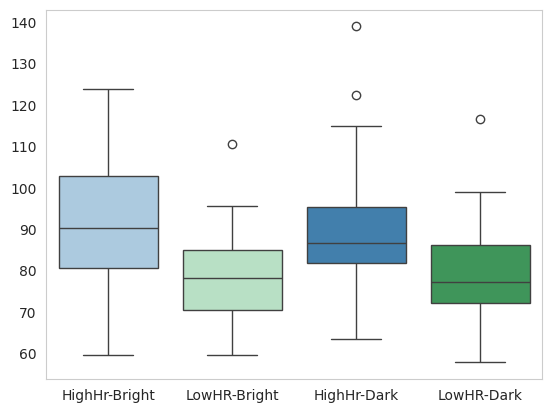

In [29]:
comet_logger.experiment.log_dataframe_profile(bvp_hr_df_fft)
comet_logger.experiment.log_dataframe_profile(bvp_hr_df_peak)
comet_logger.experiment.log_dataframe_profile(ecg_hr_df)

In [ ]:
#logging bvp_fft vs bvp_peak
compare = BlandAltman(bvp_HR_peak, bvp_HR_fft, logger=comet_logger,averaged=False )
compare.scatter_plot(
    x_label='GT BVP-peak HR [bpm]',
    y_label='GT BVP-FFT HR [bpm]',
    show_legend=True, figure_size=(5, 5))

compare.difference_plot(
    x_label='Difference between BVP HR-peak and BVP HR-FFT [bpm]',
    y_label='Average of BVP HR-peak and BVP HR-FFT [bpm]',
    show_legend=True,  figure_size=(5, 5))
plt.close("all")


In [ ]:
comet_logger.experiment.end()

## Video_differences exploration

In [6]:
# get a single frame of the video
import cv2
def getFirstFrame(videofile):
    vidcap = cv2.VideoCapture(videofile)
    success, image = vidcap.read()
    if success:
        return image

In [7]:
from collections import defaultdict

mean_pixel_values = defaultdict(dict)

for p in dataPaths:
    frame = getFirstFrame(str(p))
    mean = np.mean(frame)

    participant_ID = p.parent.parent.stem
    scenario = p.parent.stem
    mean_pixel_values[participant_ID][scenario] = mean

In [8]:
mean_pixel_values_df = pd.DataFrame.from_dict(mean_pixel_values).T
for column in mean_pixel_values_df.columns:
    mean_pixel_values_df[column] = mean_pixel_values_df[column].fillna(mean_pixel_values_df[column].mean())

In [11]:
%matplotlib inline

In [26]:
mean_pixel_values_df.boxplot(column=['0','1','2','3'])

In [ ]:
mean_pixel_values_df.columns